# FEATURE SELECTION TECHNIQUES

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
  
* [Introduction](#0)
    * [What is Feature Selection?](#0.1)   
    * [Why Feature Selection?](#0.2) 
    * [Supervised Feature Selection Techniques](#0.3)
* [Filter Methods](#1)
   * [Basic methods](#1.1)  
   * [Univariate feature selection](#1.2) 
   * [Information gain](#1.3) 
   * [Correlation Matrix with Heatmap](#1.4) 
   * [Variance Inflation Factor (VIF)](#1.5) 
* [Wrapper Methods](#2)


---
<a id="0"><h1 style="text-align: center;">INTRODUCTION</h1></a> 

---
## <a id="0.1">What is Feature Selection?</a> 

**Feature selection** or **variable selection** is the process of selecting optimal number of features from a larger set of features. 

## <a id="0.2">Why Feature Selection?</a> 

Feature selection techniques are used for several reasons:
![](https://assets-global.website-files.com/5debb9b4f88fbc3f702d579e/60ecb081507f4559c84381f5_feature-selection-graphic.png)

- Improve data's compatibility with a learning model class.
- Shorter training times.
- Avoid the curse of dimensionality.
- Simplification of models to make them easier to interpret.
- Enhanced generalization by reducing overfitting.
- Improved accuracy


## <a id="0.3">Supervised Feature Selection Techniques</a> 
- Feature selection techniques are categorized into 3 typers. These are as follows:

![](https://www.researchgate.net/profile/Enis-Karaarslan/publication/337591149/figure/fig2/AS:830089595990017@1574920190654/The-main-feature-selection-methods-for-machine-learning.png)
<!-- 
### **1. Filter Methods**

  1.    Basic methods
  2.    Univariate methods
  3.    Information gain
  4.    Fischer score
  5.    Correlation Matrix with Heatmap
  
  
### **2. Wrapper Methods**

  1.    Forward Selection
  2.    Backward Elimination
  3.    Exhaustive Feature Selection
  4.    Recursive Feature Elimination
  5.    Recursive Feature Elimination with Cross-Validation

### **3. Embedded Methods**
  1.   LASSO
  2.   RIDGE
  3.   Tree Importance -->

---
<a id="1"><h1 style="text-align: center;">FILTER METHODS</h1></a> 

---

##### 1.1 [Basic methods](#1.1)  
##### 1.2 [Univariate feature selection](#1.2) 
##### 1.3 [Information gain](#1.3) 
##### 1.4 [Fischer score](#1.4) 
##### 1.5 [ANOVA F-Value for Feature Selection](#1.5) 
##### 1.6 [Correlation Matrix with Heatmap](#1.6) 

## <a id="1.1">[1.1] Basic methods</a>
Constant features are those that have the same value for all observations in the dataset. They don’t provide any discriminatory information for machine learning models.

- To identify constant features, we can use the [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) function from sklearn. 
- I will demonstrate how to identify constant features using the Santander Customer Satisfaction dataset from [Kaggle](https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv).

**1.1.1 [Remove constant features](#1.1.1)**

**1.1.2 [Remove quasi-constant features](#1.1.2)**

In [88]:
import numpy as np 
import pandas as pd

%matplotlib inline
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (7, 6)
colors = sns.cubehelix_palette(20,reverse = True, light= 0.01,dark = 0.5, gamma= 0.7)
# sns.set_context('talk')
sns.set(style="whitegrid")
sns.set_palette(palette= sns.color_palette("RdBu",20))

### Read Data for binary classification problem

In [89]:
train_data = pd.read_csv('../input/santander-customer-satisfaction/train.csv', nrows=35000)
test_data = pd.read_csv('../input/santander-customer-satisfaction/test.csv', nrows=15000)
train_data.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [90]:
y_train = train_data['TARGET']
y_train.nunique()

2

In [91]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)
X_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


### <a id="1.1.1">1.1.1 Remove constant features</a>

`sklearn.feature_selection.VarianceThreshold` removes all features which variance doesn’t meet some threshold. 

In [92]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold()
selection.fit(X_train)

VarianceThreshold()

In [93]:
print("No. of features before removing constatnt variables: ",X_train.shape[1])
print("No. of features after removing constatnt variables: ",selection.get_support().sum())

No. of features before removing constatnt variables:  370
No. of features after removing constatnt variables:  319


In [94]:
X_train[X_train.columns[~selection.get_support()]].describe()

,ind_var2_0,ind_var2,ind_var18_0,ind_var18,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var34_0,ind_var34,...,num_var2_0_ult1,num_var2_ult1,num_reemb_var13_hace3,num_reemb_var17_hace3,num_reemb_var33_hace3,num_trasp_var17_out_hace3,num_trasp_var33_out_hace3,saldo_var2_ult1,saldo_medio_var13_medio_hace3,saldo_medio_var29_hace3
count,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,...,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 😎**OBSERVATION:**
> There are 51 features such as `ind_var2_0`, `ind_var2`, `ind_var18_0`, and others have the same value (0.0) for all observations.

In [95]:
# columns name after remove the 51 feature 
remain_columns = X_train.columns[selection.get_support()]

In [96]:
X_train = pd.DataFrame(selection.transform(X_train), columns=remain_columns)
X_test = pd.DataFrame(selection.transform(test_data), columns=remain_columns)
X_train.shape, X_test.shape

((35000, 319), (15000, 319))

### <a id="1.1.2">1.1.2 Remove quasi-constant features</a>
Quasi-constant features are those that show the same value for the great majority of the observations of the dataset. 

In [97]:
threshold=0.01
selection = VarianceThreshold(threshold)
selection.fit(X_train)

VarianceThreshold(threshold=0.01)

In [98]:
print("No. of features before removing quasi-constant variables: ",X_train.shape[1])
print("No. of features after removing quasi-constant variables: ",selection.get_support().sum())

No. of features before removing quasi-constant variables:  319
No. of features after removing quasi-constant variables:  263


In [99]:
X_train[X_train.columns[~selection.get_support()]].describe()

,ind_var1,ind_var6_0,ind_var6,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var14,ind_var17_0,ind_var17,ind_var19,...,num_reemb_var13_ult1,num_reemb_var17_ult1,num_reemb_var33_ult1,num_trasp_var17_in_hace3,num_trasp_var17_in_ult1,num_trasp_var17_out_ult1,num_trasp_var33_in_hace3,num_trasp_var33_in_ult1,num_trasp_var33_out_ult1,num_venta_var44_hace3
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,...,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,0.004029,0.000171,0.000057,0.010086,0.000029,0.000029,0.005429,0.001629,0.001371,0.004400,...,0.001371,0.000943,0.000086,0.000257,0.000171,0.000086,0.000257,0.000514,0.000086,0.000086
std,0.063344,0.013092,0.007559,0.099921,0.005345,0.005345,0.073480,0.040323,0.037008,0.066187,...,0.064129,0.073480,0.016036,0.035856,0.022678,0.016036,0.027774,0.045353,0.016036,0.016036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,9.000000,3.000000,6.000000,3.000000,3.000000,3.000000,6.000000,3.000000,3.000000


In [100]:
remain_columns = X_train.columns[selection.get_support()]
X_train = pd.DataFrame(selection.transform(X_train), columns=remain_columns)
X_test = pd.DataFrame(selection.transform(X_test), columns=remain_columns)
X_train.shape, X_test.shape

((35000, 263), (15000, 263))

#### 😎**OBSERVATION:**
> By removing constant and quasi-constant features, we reduced the feature space from 370 to 263. 

## <a id="1.2">[1.2] Univariate selection methods</a>
Univariate feature selection methods works by selecting the best features based on univariate statistical tests like ANOVA.

1.2.1 **[Select spacific number of features](#1.2.1)**:

Selects the top k features based on their statistical significance. Useful when you have a priori knowledge or constraints on the number of features to select.

1.2.2 **[Select spacific percentage of features](#1.2.2)**: 

Select features based on percentile of the highest scores.

1.2.3 **[Select features that reduces hypothesis error](#1.2.3)**:

   - Based on False Positive Rate
   - Based on False Discovery Rate
   - Family wise error
    
1.2.4 **[Mutual Information](#1.2.4)**

Select best based on mutual information between features and target. 

1.2.5 **[Flexible Approach](#1.2.5)** 

In a complex dataset with mixed data types, you might use custom scoring functions to prioritize features based on domain knowledge and model requirements.

### <a id='1.2.1'>1.2.1  Select spacific number of features</a>
Using `SelectKBest` from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) 

- **chi2**: Chi-squared stats of non-negative features for classification tasks.
- **f_classif**: ANOVA F-value between label/feature for classification tasks.
- **f_regression**: F-value between label/feature for regression tasks.

In [101]:
pd.set_option('display.max_rows', None)

#### Chi-squared stats of features

In [102]:
# from sklearn.feature_selection import SelectKBest, chi2

# KBest = 100
# selector = SelectKBest(score_func=chi2, k=KBest )
# selector.fit(X_train, y_train)

#### 😎**OBSERVATION:**
> The chi-squared test requires non-negative features. So, we will use another type.

#### ANOVA stats of features
This method is used to determine whether there are any statistically significant differences between the means of three or more independent groups. In the context of feature selection, ANOVA F-values are used to measure the **discrimination power** of each feature.
- Discrimination power: In a classification task, the goal is to distinguish between different classes or categories of the target variable based on the features. 

- **Higher** the F-value -> **ore important** feature -> the feature values for each target class are not all equal -> the feature does **have a discrimination power** between the target classes.

- F-value is significantly **greater than 1**, this is evidence against the null hypothesis, and we conclude that the feature does **have a discrimination power**.

In [103]:
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=KBest)
selector.fit(X_train, y_train)

SelectKBest(k=100)

In [104]:
feature_names = selector.feature_names_in_
scores = sorted(selector.scores_, reverse=True)
pvalues= selector.pvalues_

for i in range(len(scores)):
    print(f"Feature [{i:<3}] {feature_names[i]:<35}: {round(scores[i], 2):>6} with p-value = {round(pvalues[i], 3)}")

Feature [0  ] ID                                 :  693.2 with p-value = 0.171
Feature [1  ] var3                               : 685.25 with p-value = 0.136
Feature [2  ] var15                              : 604.45 with p-value = 0.0
Feature [3  ] imp_ent_var16_ult1                 :  567.0 with p-value = 0.51
Feature [4  ] imp_op_var39_comer_ult1            : 545.96 with p-value = 0.023
Feature [5  ] imp_op_var39_comer_ult3            : 533.29 with p-value = 0.424
Feature [6  ] imp_op_var40_comer_ult1            : 336.71 with p-value = 0.706
Feature [7  ] imp_op_var40_comer_ult3            : 324.69 with p-value = 0.834
Feature [8  ] imp_op_var40_efect_ult1            : 203.86 with p-value = 0.001
Feature [9  ] imp_op_var40_efect_ult3            : 188.24 with p-value = 0.0
Feature [10 ] imp_op_var40_ult1                  :  62.96 with p-value = 0.612
Feature [11 ] imp_op_var41_comer_ult1            :  61.09 with p-value = 0.02
Feature [12 ] imp_op_var41_comer_ult3            :  60.98 

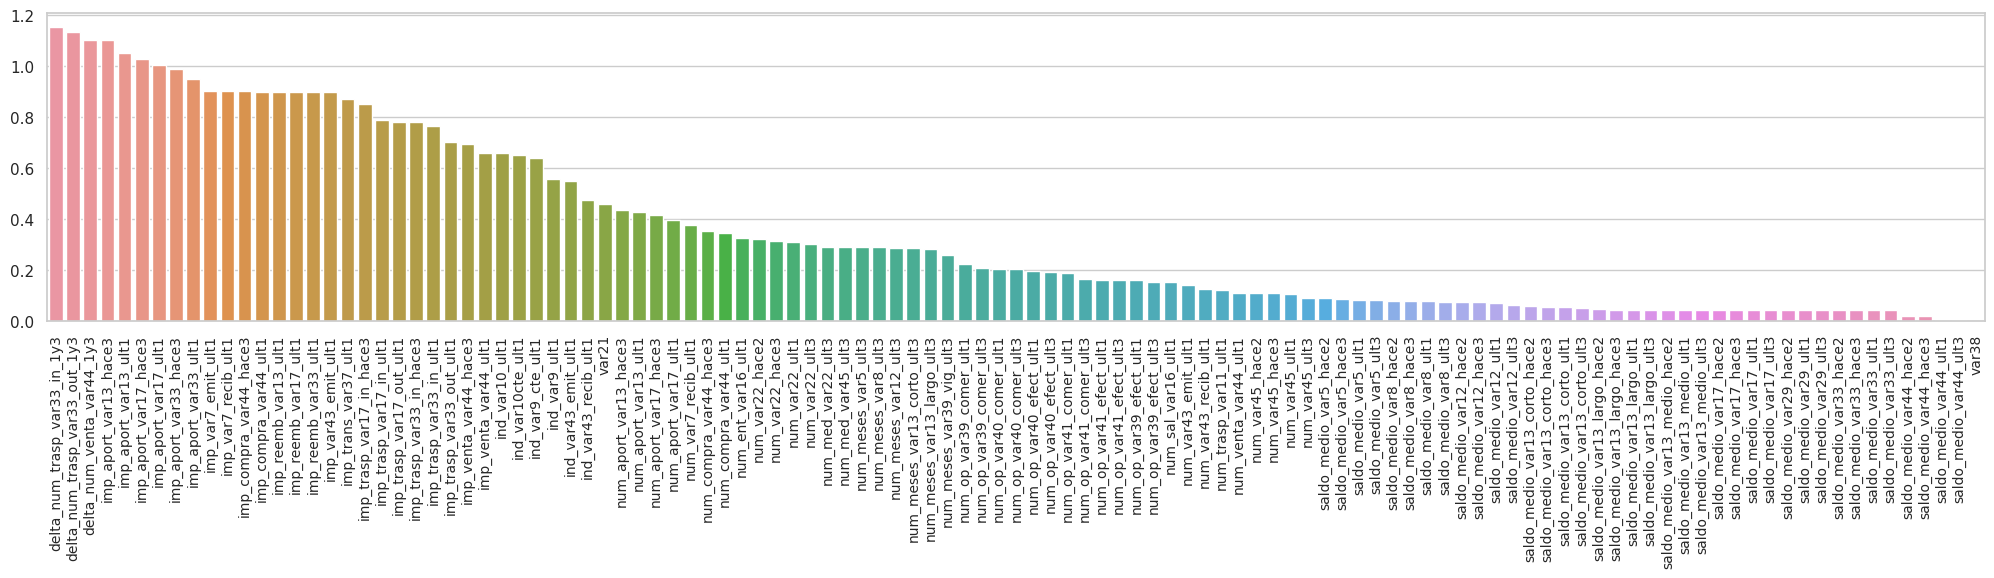

In [105]:
plt.rcParams["figure.figsize"] = (25,4)
sns.barplot(x=feature_names[150:], y=scores[150:])
plt.xticks(rotation=90, fontsize=10)
plt.show()

#### 😎**OBSERVATION:**
> Features with F-values less than one might not have significant discriminative power in relation to the target variable compared to those with higher F-values.
> we should increase KBest to **156**

In [106]:
for i in range(len(scores)):
    if pvalues[i] > 0.05:
        print(f"Feature [{i:<3}] {feature_names[i]:<35}: {round(scores[i], 2):>6} with p-value = {round(pvalues[i], 3)}")

Feature [0  ] ID                                 :  693.2 with p-value = 0.171
Feature [1  ] var3                               : 685.25 with p-value = 0.136
Feature [3  ] imp_ent_var16_ult1                 :  567.0 with p-value = 0.51
Feature [5  ] imp_op_var39_comer_ult3            : 533.29 with p-value = 0.424
Feature [6  ] imp_op_var40_comer_ult1            : 336.71 with p-value = 0.706
Feature [7  ] imp_op_var40_comer_ult3            : 324.69 with p-value = 0.834
Feature [10 ] imp_op_var40_ult1                  :  62.96 with p-value = 0.612
Feature [12 ] imp_op_var41_comer_ult3            :  60.98 with p-value = 0.351
Feature [19 ] imp_sal_var16_ult1                 :  48.29 with p-value = 0.742
Feature [20 ] ind_var1_0                         :  46.56 with p-value = 0.343
Feature [42 ] ind_var37_cte                      :  26.24 with p-value = 0.569
Feature [43 ] ind_var37_0                        :  26.21 with p-value = 0.69
Feature [44 ] ind_var37                          :  25

#### 😎**OBSERVATION:**
> Fot the above features the high p-value (>0.05) suggests that the differences in the means for different classes could be due to **random chance**. In other words, this feature might not be as important for the classification task as the F-value might suggest.

### <a id='1.2.2'>1.2.2 Select spacific percentage of features</a>
Using `SelectPercentile` from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile)


In [107]:
from sklearn.feature_selection import SelectPercentile

per = 60 #Percent of features to keep.
selector = SelectPercentile(f_classif, percentile=per)
tranformed_X_train = selector.fit_transform(X_train, y_train)
tranformed_X_train.shape

(35000, 158)

### <a id='1.2.3'>1.2.3 Select features that reduces hypothesis error</a>

1.2.3 **[Select features that reduces hypothesis error](#1.2.3)**:

   a) **Based on False Positive Rate**: [SelectFpr](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFpr.html) select features based on a false positive rate test. SelectFpr focuses on controlling the false positive rate, which is the probability of incorrectly rejecting a true null hypothesis (Type I error).
    
   - minimize the risk of selecting irrelevant features (كتير reject مش).
   - It operates by adjusting the threshold on the p-values of the features.
   - `SelectFpr` allows you to set the desired level of significance (alpha) directly.
   - **Example:** In a credit risk analysis, you could use`SelectFpr` to remove features with insignificant impact on default rates, thereby reducing the risk of approving high-risk applicants.


   b) **Based on False Discovery Rate**:[SelectFdr](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFdr.html) is the same as `SelectFpr` but by controlling the  the proportion of falsely rejected null hypotheses.

   - Unlike `SelectFpr`, `SelectFdr` does not require you to specify the significance level (alpha) directly. Instead, it estimates the threshold based on the desired false discovery rate.


   c) **Family wise error:** [SelectFwe](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFwe.html) select features based on family-wise error rate. Applicable when you're concerned about overall error rates in multiple hypothesis tests.

#### Based on False Positive Rate

In [108]:
from sklearn.feature_selection import SelectFpr
selector = SelectFpr(f_classif, alpha=0.05)
transformed_x_train = selector.fit_transform(X_train, y_train)
transformed_x_train.shape

(35000, 121)

In [109]:
feature_names = selector.feature_names_in_
scores = sorted(selector.scores_, reverse=True)
pvalues= selector.pvalues_

for i in range(len(scores)):
    if pvalues[i] > 0.05: 
        print(f"Feature [{i:<3}] {feature_names[i]:<35}: {round(scores[i], 2):>6} with p-value = {round(pvalues[i], 3)}")

Feature [0  ] ID                                 :  693.2 with p-value = 0.171
Feature [1  ] var3                               : 685.25 with p-value = 0.136
Feature [3  ] imp_ent_var16_ult1                 :  567.0 with p-value = 0.51
Feature [5  ] imp_op_var39_comer_ult3            : 533.29 with p-value = 0.424
Feature [6  ] imp_op_var40_comer_ult1            : 336.71 with p-value = 0.706
Feature [7  ] imp_op_var40_comer_ult3            : 324.69 with p-value = 0.834
Feature [10 ] imp_op_var40_ult1                  :  62.96 with p-value = 0.612
Feature [12 ] imp_op_var41_comer_ult3            :  60.98 with p-value = 0.351
Feature [19 ] imp_sal_var16_ult1                 :  48.29 with p-value = 0.742
Feature [20 ] ind_var1_0                         :  46.56 with p-value = 0.343
Feature [42 ] ind_var37_cte                      :  26.24 with p-value = 0.569
Feature [43 ] ind_var37_0                        :  26.21 with p-value = 0.69
Feature [44 ] ind_var37                          :  25

#### Based on False Discovery Rate

In [110]:
from sklearn.feature_selection import SelectFdr
selector = SelectFdr(f_classif, alpha=0.05)
transformed_x_train = selector.fit_transform(X_train, y_train)
transformed_x_train.shape

(35000, 110)

#### Family wise errors

In [111]:
from sklearn.feature_selection import SelectFwe

selector = SelectFwe(f_classif, alpha=0.05)
transformed_x_train = selector.fit_transform(X_train, y_train)
transformed_x_train.shape

(35000, 76)

### <a id='1.2.5'>1.2.5 Flexible Approach</a>
In a complex dataset with mixed data types, you might use [GenericUnivariateSelection](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.GenericUnivariateSelect.html) with custom scoring functions to prioritize features based on domain knowledge and model requirements.

   - **Example:** In a high-dimensional dataset, you could use it to experiment with different feature selection strategies such as combining chi-squared statistics with mutual information to capture both linear and non-linear relationships.
   
##### **GenericUnivariateSelection**:   
- `score_func`: callable, default=`f_classif`.
- `mode`: {‘percentile’, ‘k_best’, ‘fpr’, ‘fdr’, ‘fwe’}
- `param`: “all”, float, or int, default=`1e-5`} Parameter of the corresponding mode.



In [112]:
from sklearn.feature_selection import GenericUnivariateSelect

selector = GenericUnivariateSelect(score_func=f_classif, mode='fwe', param=0.05)
tranformed_x_train = selector.fit_transform(X_train, y_train)
tranformed_x_train.shape

(35000, 76)

In [113]:
selected_indices = selector.get_support(indices=True)
selected_feature_names = X_train.columns[selected_indices]
tranformed_x_train = X_train[selected_feature_names]
tranformed_x_train.head(5)

,var15,imp_op_var40_efect_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var5_0,ind_var5,...,num_meses_var12_ult3,num_meses_var13_corto_ult3,num_op_var40_efect_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3
0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,300.0,300.0,240.75
2,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,37.0,0.0,0.0,0.0,195.0,0.0,0.0,195.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


## <a id='1.3'>[1.3] Information Gain </a>
Information gain or [mutual information](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif) measures how much information the presence/absence of a feature contributes to making the correct prediction on the target.
- For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. 
- Mutual information (MI) is a non-negative value, which measures the dependency between the variables.
- Used in both classification and regression tasks.

- Use [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) and [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile) from scikit-learn with the following parameters to apply this technique.

    - **mutual_info_classif**: Mutual information for for classification tasks.
    - **mutual_info_regression**: Mutual information for regression tasks.

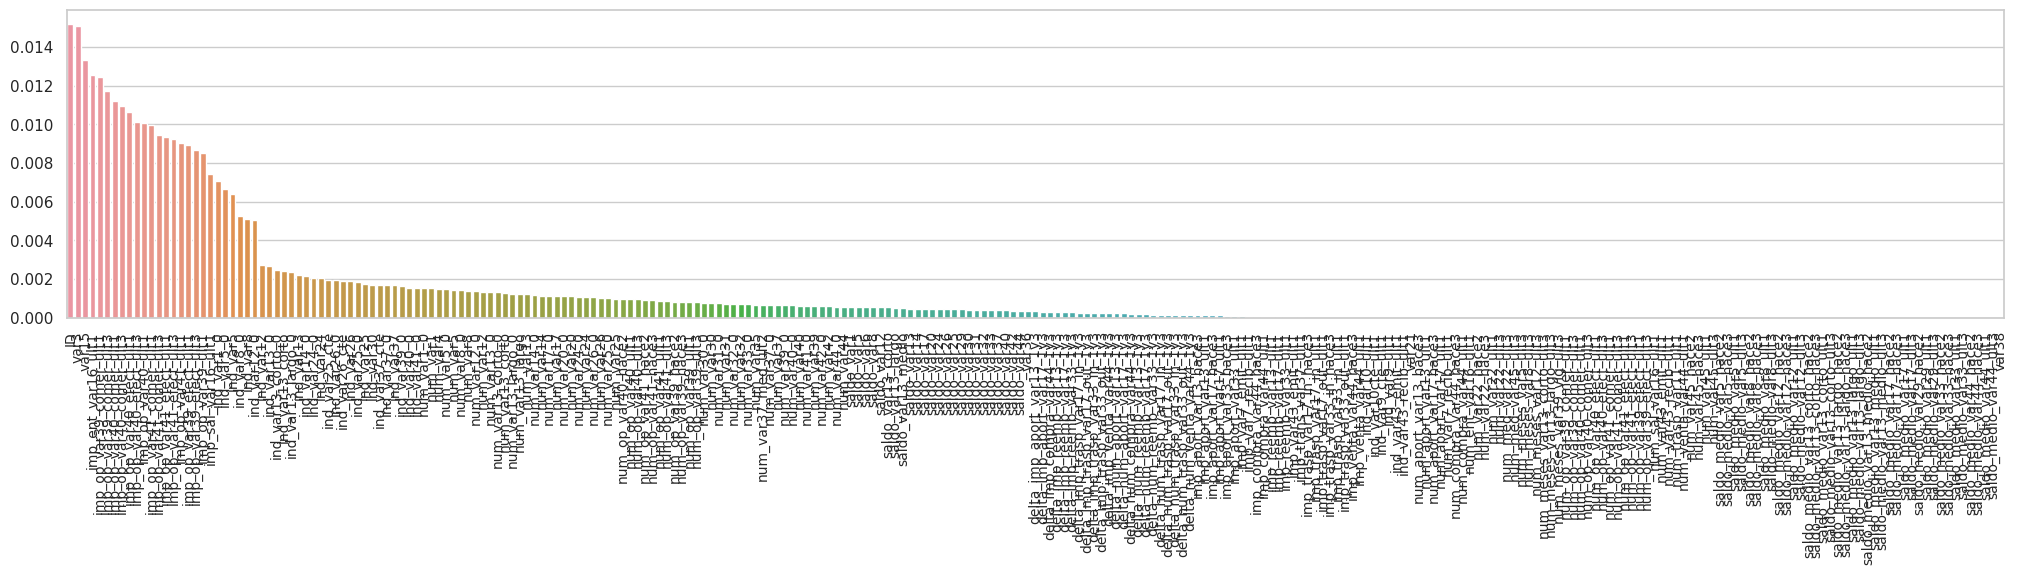

In [114]:
from sklearn.feature_selection import mutual_info_classif
MIs = mutual_info_classif(X_train, y_train)

plt.rcParams["figure.figsize"] = (25,4)
sns.barplot(x=X_train.columns,y=sorted(MIs, reverse=True))
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [115]:
selector = SelectKBest(mutual_info_classif, k=100)
transformed_x_train = selector.fit_transform(X_train, y_train)
transformed_x_train.shape

(35000, 100)

In [116]:
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [X_train.columns[i] for i in selected_feature_indices]
X_train[selected_feature_names].describe()

,ID,var15,imp_ent_var16_ult1,imp_op_var40_efect_ult3,imp_op_var41_comer_ult1,imp_op_var41_efect_ult3,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var5_0,ind_var5,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace3,saldo_medio_var29_ult1,var38
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,...,3.500000e+04,35000.000000,35000.000000,35000.000000,35000.000000,3.500000e+04,3.500000e+04,35000.000000,35000.000000,3.500000e+04
mean,35040.982543,33.232829,92.786913,0.765369,68.465757,113.336223,114.101591,141.120841,0.957400,0.659457,...,9.572716e+02,1091.978862,1050.946335,133.570361,118.650547,4.142271e+03,4.499504e+03,547.171409,0.551486,1.191658e+05
std,20191.927231,12.972893,1944.187484,45.805403,319.251579,810.608763,815.320243,710.677367,0.201956,0.473899,...,1.222424e+04,9900.271140,8766.705349,2440.567567,2163.481115,4.031831e+04,3.605289e+04,7102.562745,76.751694,2.353304e+05
min,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.310000e+00,-922.380000,-476.070000,-3401.340000,-1844.520000,0.000000e+00,0.000000e+00,0.000000,0.000000,5.163750e+03
25%,17620.750000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,6.783885e+04
50%,35052.500000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,9.600000e-01,3.000000,2.700000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.067330e+05
75%,52557.250000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.245000e+01,90.000000,83.287500,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.195424e+05
max,69982.000000,102.000000,210000.000000,6600.000000,12888.030000,48660.000000,48660.000000,37299.510000,1.000000,1.000000,...,1.542339e+06,600450.000000,544365.570000,228031.800000,177582.000000,3.000538e+06,2.195123e+06,304838.700000,13793.670000,2.203474e+07


## <a id='1.4'>[1.4] Correlation Matrix with Heatmap </a>

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

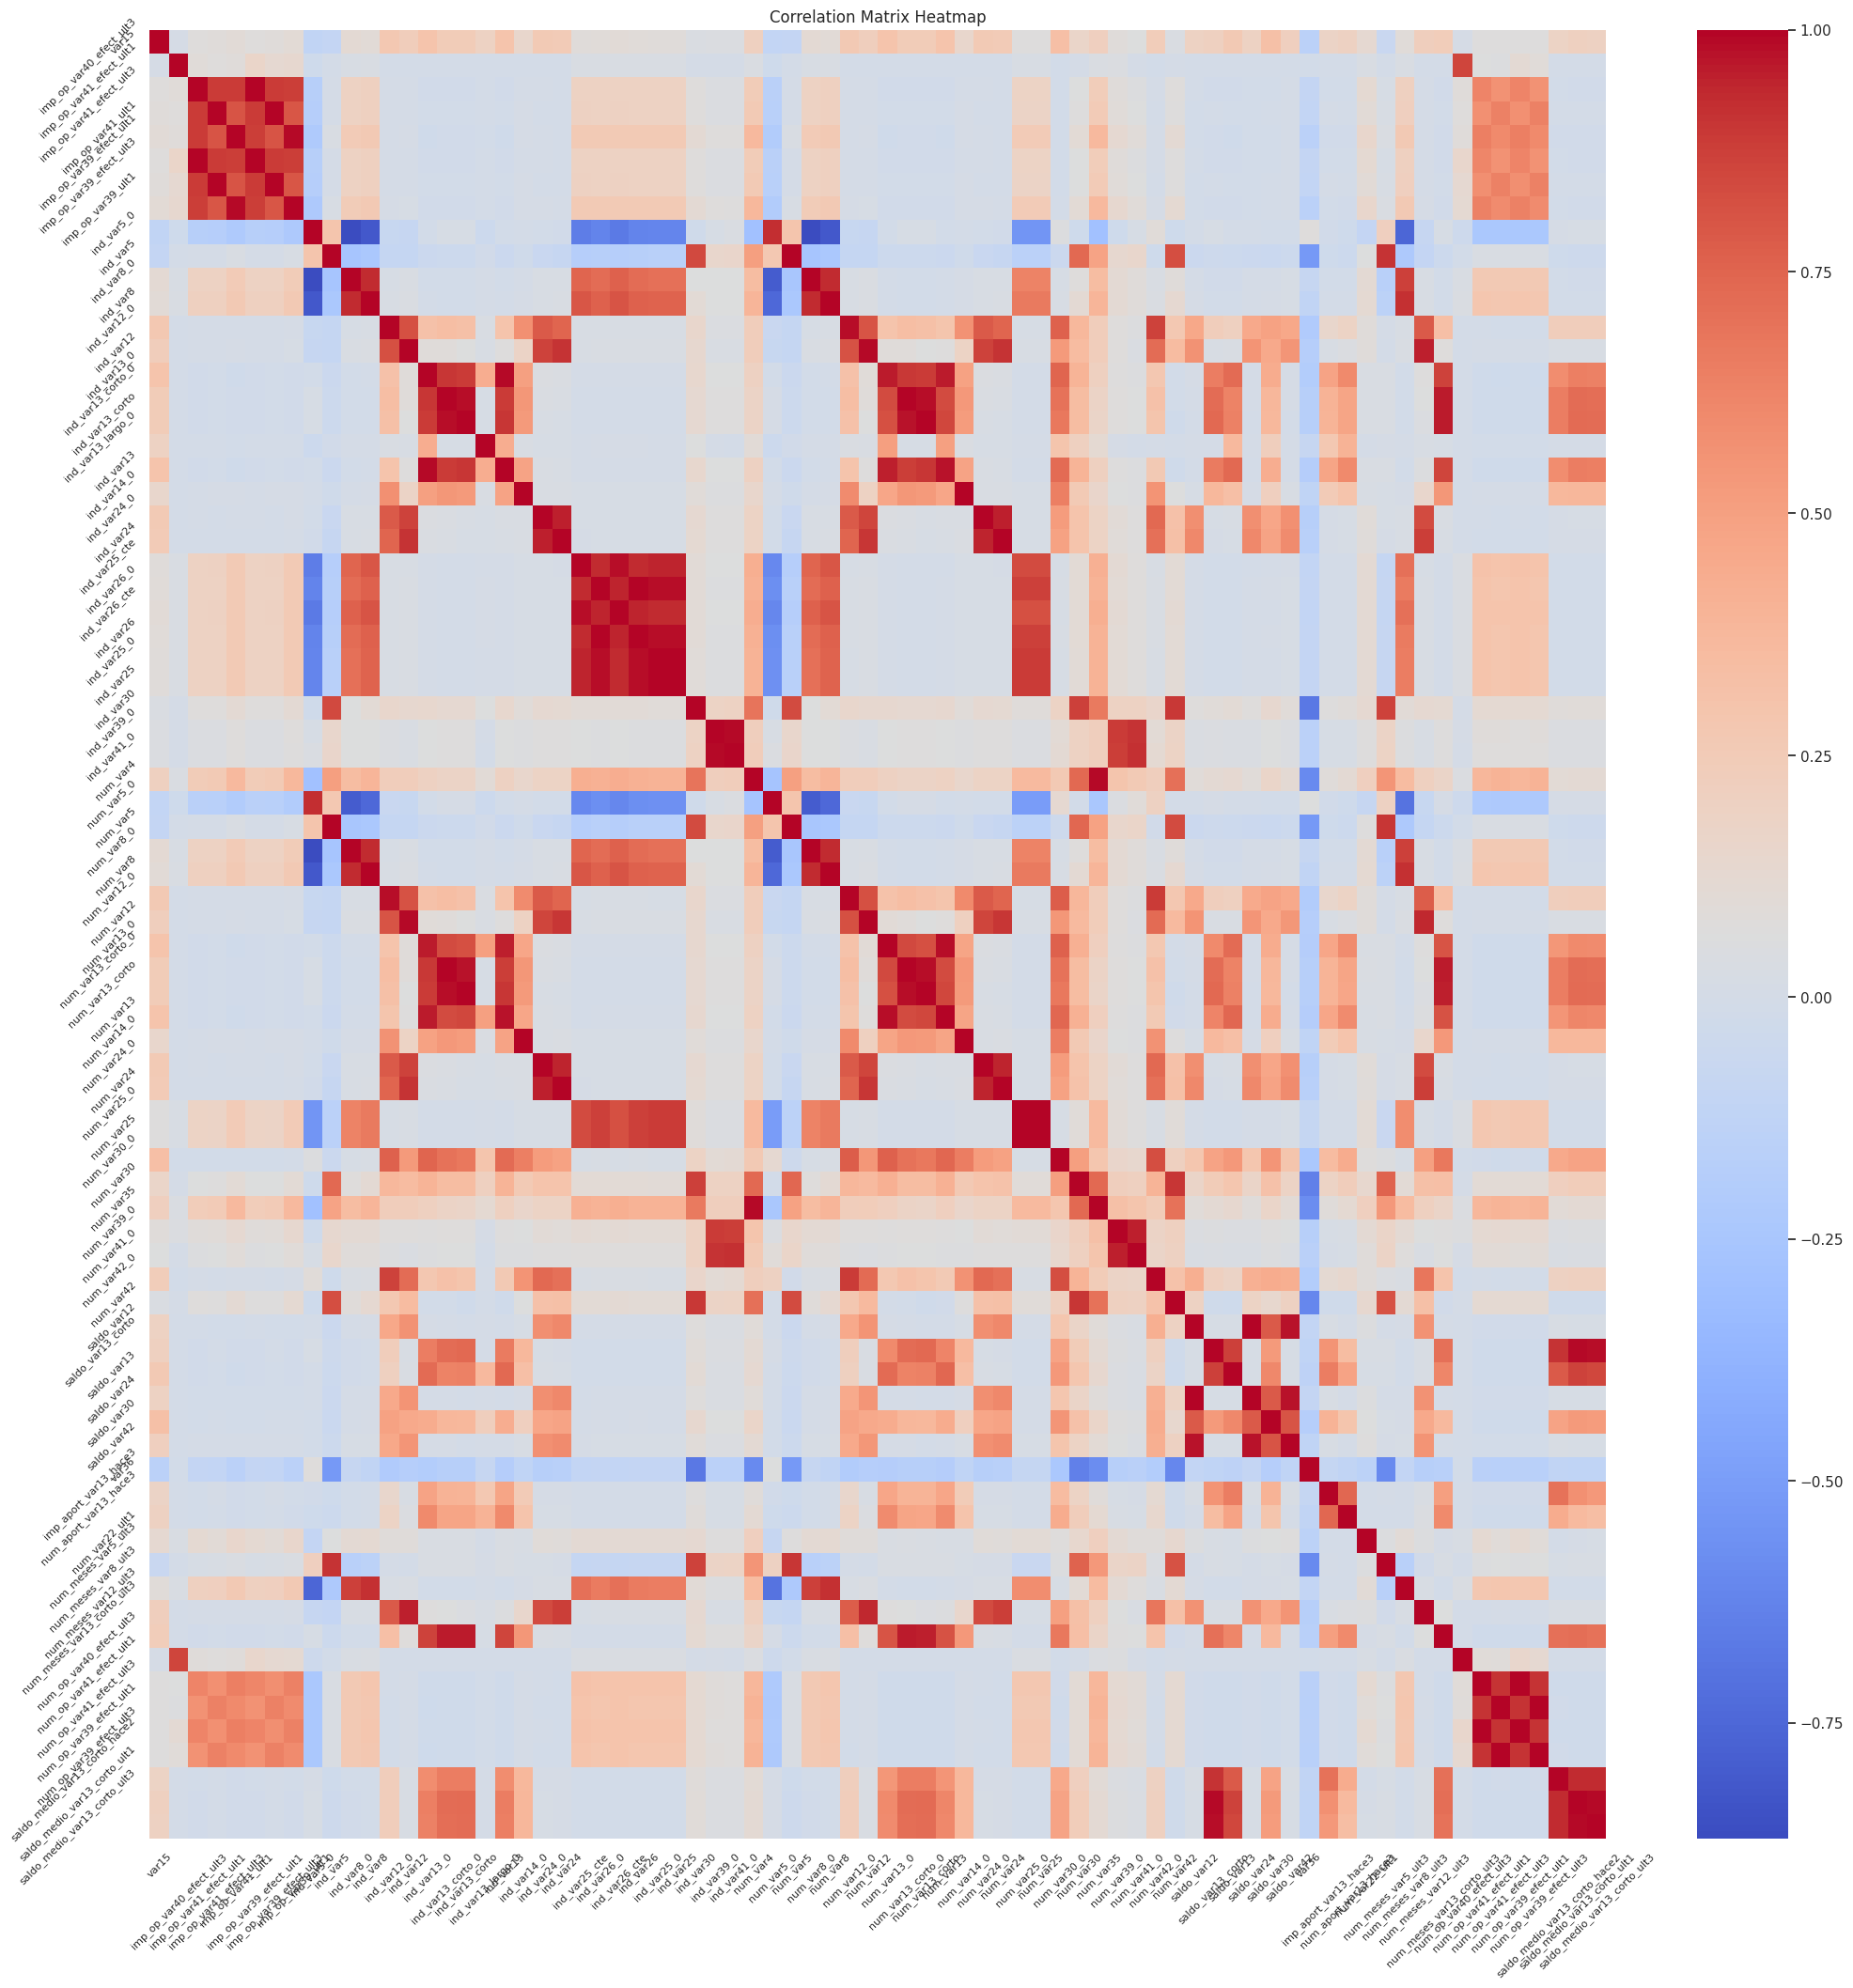

In [117]:
corr_matrix = tranformed_x_train.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, cmap='coolwarm',annot=False)#, fmt=".2f", linewidths=0.2)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=45, fontsize=8)
plt.title('Correlation Matrix Heatmap')

## <a id='1.5'>[1.5] Variance Inflation Factor (VIF)</a>

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [119]:
def remove_high_vif_features(X, threshold=5):
    vif_data = calculate_vif(X)
    high_vif_features = vif_data[vif_data["VIF"] > threshold]
    
    if len(high_vif_features) == 0:
        print("No features with VIF greater than the threshold.")
        return X
    else:
        print("Features with high VIF:", high_vif_features["Feature"].tolist())
        # Drop the features with high VIF
        X_filtered = X.drop(columns=high_vif_features["Feature"].tolist())
        print("Removed high VIF features. New shape:", X_filtered.shape)
        return X_filtered

In [120]:
threshold_vif = 10
X_filtered = remove_high_vif_features(tranformed_x_train, threshold_vif)
X_filtered.shape

/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Features with high VIF: ['imp_op_var40_efect_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var5_0', 'ind_var5', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13', 'ind_var14_0', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var30', 'ind_var39_0', 'ind_var41_0', 'num_var4', 'num_var5_0', 'num_var5', 'num_var8_0', 'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_var14_0', 'num_var24_0', 'num_var24', 'num_var25_0', 'num_var25', 'num_var30_0', 'num_var30', 'num_var35', 'num_var39_0', 'num_var41_0', 'num_var42_0', 'num_var42', 'saldo_var12', 'saldo_var13_corto', 'saldo_var13', 'saldo_var24', 'saldo_var30', 'saldo_var42', 'num_meses_var5_ult3', 'num

(35000, 6)

Resources: 

Image Credits: 
- https://www.researchgate.net/profile/Enis-Karaarslan/publication/337591149
- https://www.omnisci.com/technical-glossary/feature-selection